In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
import re

In [2]:
from folium.plugins import HeatMap
import folium
#위도와 경도를 받아서 지도에 표시를 하는 라이브러리
#웹 상에서 작동하는 것처럼 보인다.(아직 정확하진 않음)

각 파일들 시각화

1.TimeGender

In [3]:
TimeGender = pd.read_csv('TimeGender.csv')

In [4]:
display(TimeGender)

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
5,2020-03-04,0,female,3332,12
6,2020-03-05,0,male,2149,21
7,2020-03-05,0,female,3617,14
8,2020-03-06,0,male,2345,25
9,2020-03-06,0,female,3939,17


In [5]:
TimeMale = TimeGender[TimeGender['sex']=='male']
TimeFemale = TimeGender[TimeGender['sex']=='female']

TimeMale => TimeGender에서 남자의 자료

TimeFemale => TimeGender에서 여자의 자료

일단 TimeGender.csv 만 보았을때에는 모든 데이터들의 날짜가 2020-03 안에 포함이 되어 있으므로,

내가 이것을 알고만 있다면 굳이 여러군데에 쓸 필요가 없다.

## 따라서 loc을 이용하여 **날짜만 나타내어 주는 int_day**라는 함수를 작성하였다. 

In [6]:
def int_day(df, col):
    for i in df.index:
        val = df.loc[i, col]
        val = int(re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', val))# 특수문자 제거 , 정수화
        val = val%100
        df.loc[i, col] = val

In [7]:
int_day(TimeMale, 'date')
int_day(TimeFemale, 'date')
int_day(TimeGender, 'date')

[Text(0.5, 0, 'Deceased'), Text(0.5, 1.0, 'Female Deceased')]

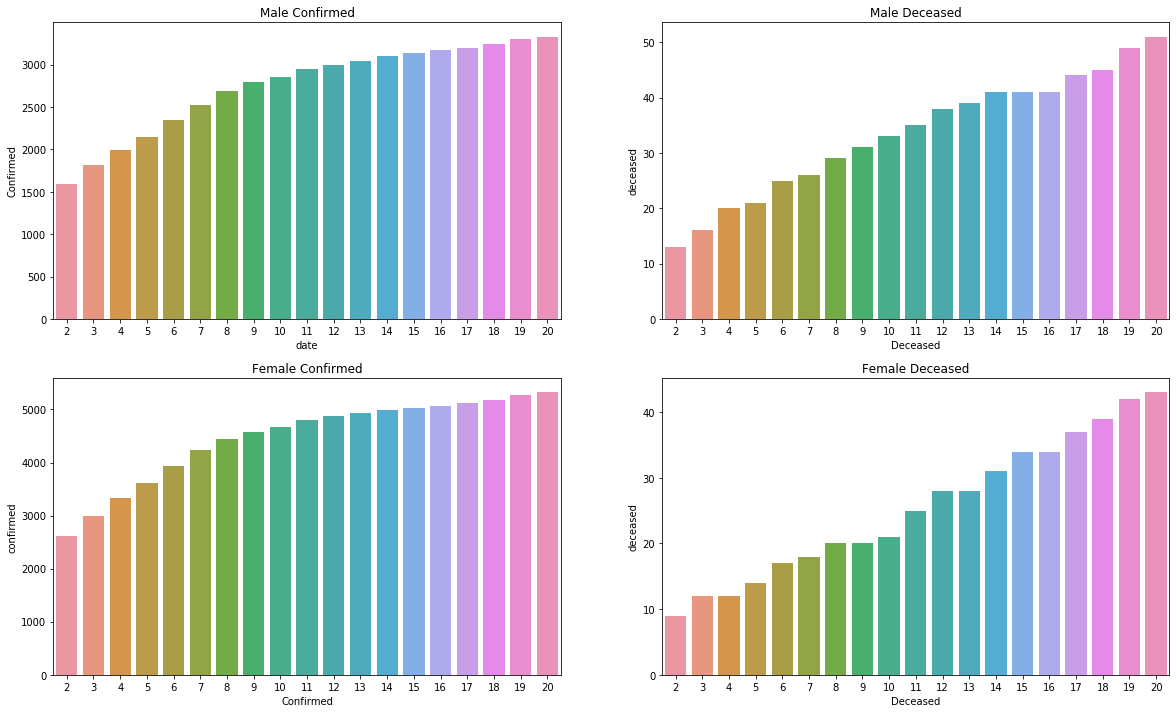

In [8]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,12)

sns.barplot(data=TimeMale, x="date", y="confirmed", ax=ax1)
sns.barplot(data=TimeMale, x="date", y="deceased", ax=ax2)
sns.barplot(data=TimeFemale, x="date", y="confirmed", ax=ax3)
sns.barplot(data=TimeFemale, x="date", y="deceased", ax=ax4)


ax1.set(ylabel='Confirmed',title="Male Confirmed")
ax2.set(xlabel='Deceased',title="Male Deceased")
ax3.set(xlabel='Confirmed', title="Female Confirmed")
ax4.set(xlabel='Deceased', title="Female Deceased")

남자의 확진자, 사망자수 

여자의 확진자, 사망자수

누적값의 그래프

In [9]:
def day_count_gender(df, col, new_name):
    l = list()
    for i in df.index:
        if (i==0) or (i==1):
            l.append(df.loc[i,col])
        else:
            l.append(df.loc[i, col] - df.loc[i-2, col])
    df[new_name] = l

이 day_count_gender라는 함수는 위의 자료들이 거의 대부분 누적값의 그래프를 갖고 있기 때문에

당일의 확진자수, 사망자수 등의 당일 수치를 찾아내기 위한 함수를 만들었다. 

In [10]:
day_count_gender(TimeMale, 'confirmed', 'day_confirmed')
day_count_gender(TimeFemale, 'confirmed', 'day_confirmed')
day_count_gender(TimeMale, 'deceased', 'day_deceased')
day_count_gender(TimeFemale, 'deceased', 'day_deceased')

In [11]:
TimeMale = TimeMale.drop([0])
TimeFemale = TimeFemale.drop([1])

In [12]:
TimeMale.reset_index()
TimeFemale.reset_index()

,index,date,time,sex,confirmed,deceased,day_confirmed,day_deceased
0,3,3,0,female,3002,12,381,3
1,5,4,0,female,3332,12,330,0
2,7,5,0,female,3617,14,285,2
3,9,6,0,female,3939,17,322,3
4,11,7,0,female,4245,18,306,1
5,13,8,0,female,4440,20,195,2
6,15,9,0,female,4583,20,143,0
7,17,10,0,female,4661,21,78,1
8,19,11,0,female,4808,25,147,4
9,21,12,0,female,4875,28,67,3


데이터 프레임에서 데이터들을 뽑아 이전에는 인덱스가 홀수, 짝수로 나뉘어 있었으나,

reset_index()함수를 통해서 다시 인덱스를 정리해주었다. 

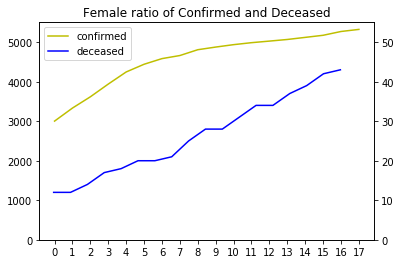

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(TimeFemale['date']))

line1 = ax1.plot(x, TimeFemale['confirmed'], color = 'y', label = 'confirmed')
line2 = ax2.plot(x,  TimeFemale['deceased'], color = 'b', label = 'deceased')


plt.xticks(np.arange(0, 20))

ax1.set_ylim(0, 5500)
ax2.set_ylim(0, 55)

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.title('Female ratio of Confirmed and Deceased')


plt.show()

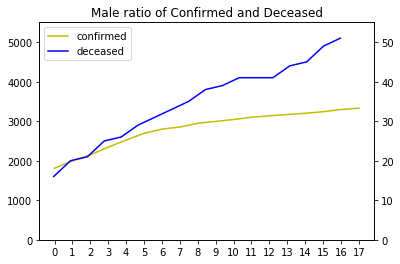

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(TimeMale['date']))

line1 = ax1.plot(x, TimeMale['confirmed'], color = 'y', label = 'confirmed')
line2 = ax2.plot(x,  TimeMale['deceased'], color = 'b', label = 'deceased')


plt.xticks(np.arange(0, 20))

ax1.set_ylim(0, 5500)
ax2.set_ylim(0, 55)

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.title('Male ratio of Confirmed and Deceased')

plt.show()

노란선은 왼쪽 축을 기준으로 수치를 나타낸 것이고, 

파란 선은 오른쪽 축을 기준으로 수치를 나타낸 것이다. 

수치는 다르지만, 일정한 비율로 만들어 비율을 확인하는데 사용했다. 

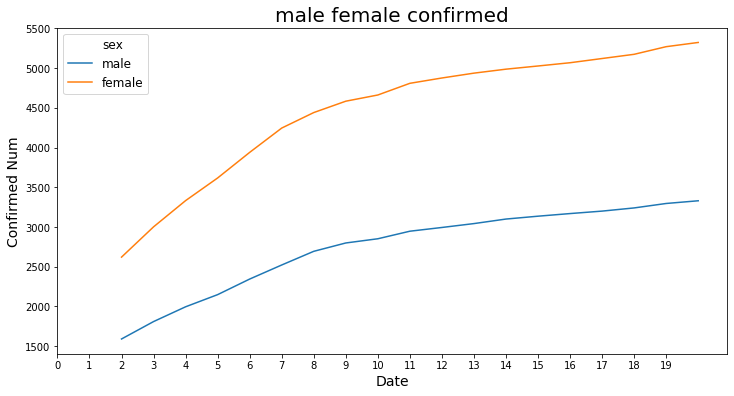

In [15]:
plt.figure(figsize = (12, 6))

ax = sns.lineplot(x='date', 

                  y='confirmed', 

                  hue='sex',

                  data=TimeGender)
plt.xticks(np.arange(0,20))

plt.title('male female confirmed', fontsize=20)

plt.ylabel('Confirmed Num', fontsize=14)

plt.xlabel('Date', fontsize=14)

plt.legend(fontsize=12, loc='best')



plt.show()

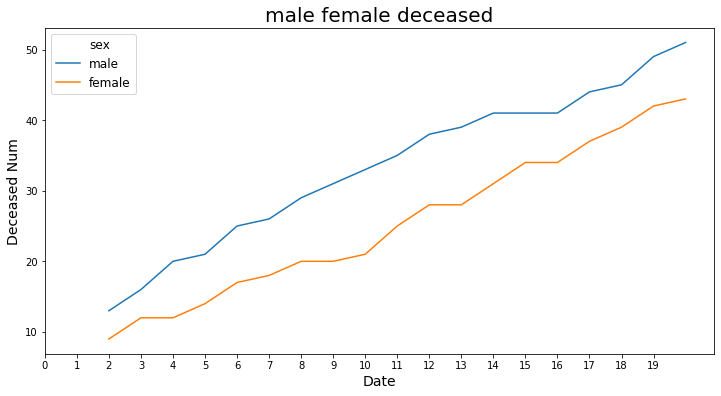

In [16]:
plt.figure(figsize = (12, 6))

ax = sns.lineplot(x='date', 

                  y='deceased', 

                  hue='sex',

                  data=TimeGender)


plt.xticks(np.arange(0,20))

plt.title('male female deceased', fontsize=20)

plt.ylabel('Deceased Num', fontsize=14)

plt.xlabel('Date', fontsize=14)

plt.legend(fontsize=12, loc='best')



plt.show()

남녀의 확진자수와 남녀의 사망자수를 비교하였다. 

확진자 수는 여성이 더 많이 나타나고 있지만, 사망자 수는 오히려 남성이 더 많이 나타내는 경향을 보였다. 

In [17]:
TimeMale['ratio'] = (TimeMale['deceased'] / TimeMale['confirmed']) * 10000
TimeFemale['ratio'] = TimeFemale['deceased'] / TimeFemale['confirmed'] * 10000
TimeMale['day_ratio'] = TimeMale['day_deceased'] / TimeMale['day_confirmed'] * 10000
TimeFemale['day_ratio'] = TimeFemale['day_deceased'] / TimeFemale['day_confirmed'] * 10000

앞의 그래프를 보고, 남녀별 사망자수/확진자수를 나타내었다.

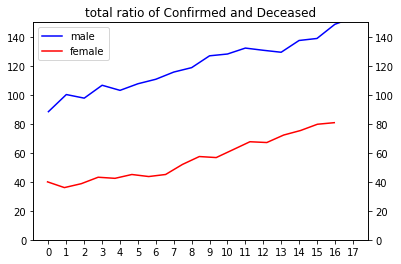

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(TimeFemale['date']))

line1 = ax1.plot(x, TimeMale['ratio'], color = 'b', label = 'male')
line2 = ax2.plot(x,  TimeFemale['ratio'], color = 'r', label = 'female')

ax1.set_ylim(0, 150)
ax2.set_ylim(0,150)
plt.xticks(np.arange(0, 20))


lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.title('total ratio of Confirmed and Deceased')


plt.show()


좌우 축의 범위는 같은 것이니 따로 신경 쓸 필요 없다. 

일단 확실히 남자의 치사율(사망자수 / 확진자 수)이 높은 것을 알 수 있다. 

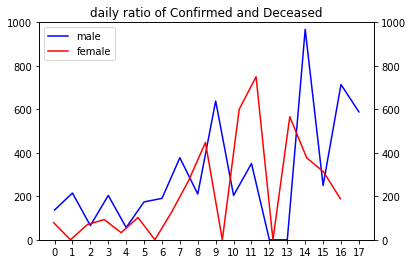

In [19]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.arange(len(TimeFemale['date']))

line1 = ax1.plot(x, TimeMale['day_ratio'], color = 'b', label = 'male')
line2 = ax2.plot(x,  TimeFemale['day_ratio'], color = 'r', label = 'female')


ax1.set_ylim(0,1000)
ax2.set_ylim(0, 1000)

plt.xticks(np.arange(0, 20))


lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.title('daily ratio of Confirmed and Deceased')


plt.show()

당일에 나온 값은 사망자 수가 수치가 너무 낮아 조금씩 변화가 있더라도 그래프가 너무 많이 요동치는 모습을 보였다. 

# Time

In [20]:
Time = pd.read_csv('Time.csv')

In [21]:
display(Time)

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
56,2020-03-16,0,274504,251297,8236,1137,75
57,2020-03-17,0,286716,261105,8320,1401,81
58,2020-03-18,0,295647,270888,8413,1540,84
59,2020-03-19,0,307024,282555,8565,1947,91


In [22]:
def int_month_day(df, col):
    for i in df.index:
        val = df.loc[i, col]
        val = re.sub('[-]', '/', val)# 특수문자 제거 , 정수화
        val = val[-4:]
        df.loc[i, col] = val

In [23]:
int_month_day(Time, 'date')

In [24]:
del Time['time']

In [25]:
def day_count4(df, col, new_name):
    l = list()
    for i in df.index:
        if i==0:
            l.append(df.loc[i,col])
        else:
            l.append(df.loc[i, col] - df.loc[i-1, col])
    df[new_name] = l

In [26]:
day_count4(Time, 'test', 'day_test')
day_count4(Time, 'negative', 'day_negative')
day_count4(Time, 'confirmed', 'day_confirmed')
day_count4(Time, 'released', 'day_released')
day_count4(Time, 'deceased', 'day_deceased')

In [27]:
Time = Time.loc[:, ['date', 'test','negative','confirmed', 'released', 'deceased']]

In [28]:
display(Time)

,date,test,negative,confirmed,released,deceased
0,1/20,1,0,1,0,0
1,1/21,1,0,1,0,0
2,1/22,4,3,1,0,0
3,1/23,22,21,1,0,0
4,1/24,27,25,2,0,0
...,...,...,...,...,...,...
56,3/16,274504,251297,8236,1137,75
57,3/17,286716,261105,8320,1401,81
58,3/18,295647,270888,8413,1540,84
59,3/19,307024,282555,8565,1947,91


이로써 날짜를 간단하게 나타내고, 

각 날의 테스트 한 사람수, 음성판정 수, 확진자 수, 퇴원자 수, 사망자 수를 나타내었다. 

In [29]:
Time['total'] = Time['negative'] + Time['confirmed'] + Time['released'] + Time['deceased']

# 얼추 보았을 때, 테스트를 한 사람의 수와 나머지들의 합이 논리적으로는 같아야 하지만, 

# 일단 내 생각에는 test하는 사람의 수가 너무 많아지면서 결과 도출을 하는데에 많은 시간이 걸린다는 것을 유추

# 그렇다면, 급증하는 그 시간부터 어떤 불안요소가 존재하지 않을까? 라고 생각

In [30]:
Time['gap'] = Time['test'] - Time['total']

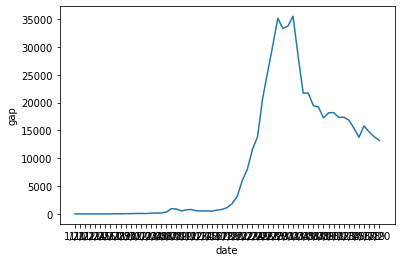

In [31]:
sns.lineplot(x = 'date', y = 'gap', data = Time)

[Text(0.5, 0, 'Total deceased'), Text(0.5, 1.0, 'Total Deceased')]

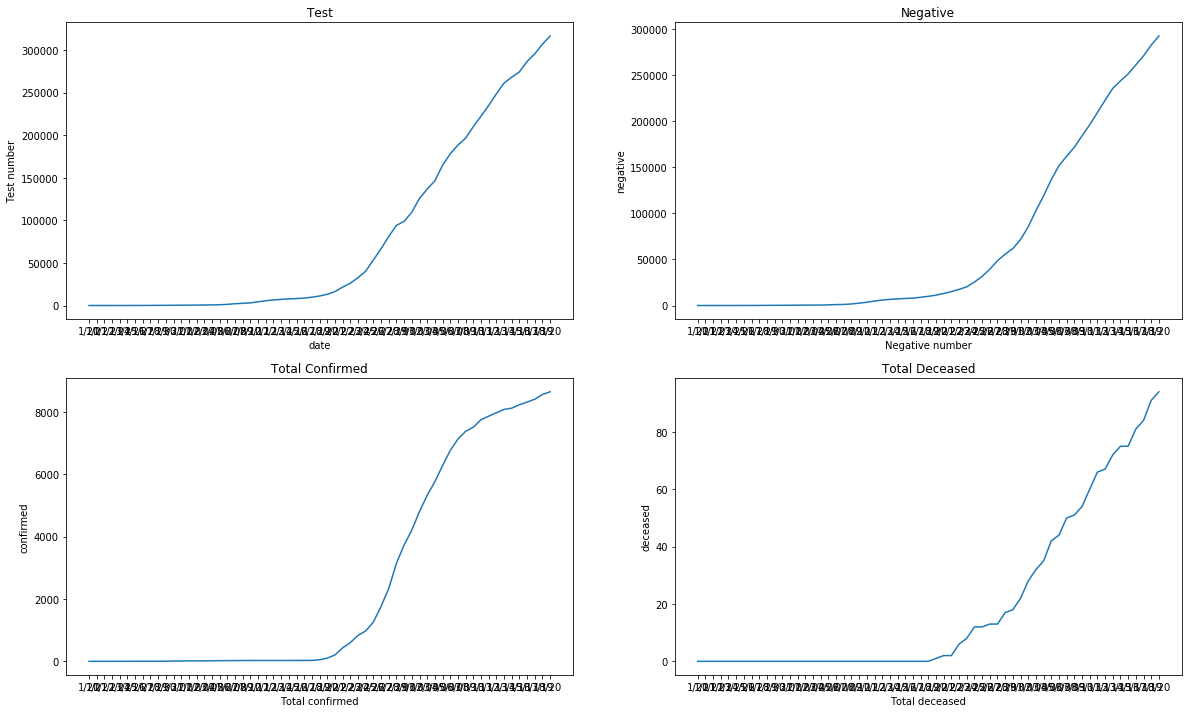

In [32]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,12)

sns.lineplot(data=Time, x="date", y="test", ax=ax1)
sns.lineplot(data=Time, x="date", y="negative", ax=ax2)
sns.lineplot(data=Time, x="date", y="confirmed", ax=ax3)
sns.lineplot(data=Time, x="date", y="deceased", ax=ax4)


ax1.set(ylabel='Test number',title="Test")
ax2.set(xlabel='Negative number',title="Negative")
ax3.set(xlabel='Total confirmed', title="Total Confirmed")
ax4.set(xlabel='Total deceased', title="Total Deceased")

In [33]:
Time_1 = Time[Time['date']>='3/03']

In [34]:
Time_1.reset_index()

,index,date,test,negative,confirmed,released,deceased,total,gap
0,43,3/03,125851,85484,4812,34,28,90358,35493
1,44,3/04,136707,102965,5328,41,32,108366,28341
2,45,3/05,146541,118965,5766,88,35,124854,21687
3,46,3/06,164740,136624,6284,108,42,143058,21682
4,47,3/07,178189,151802,6767,118,44,158731,19458
5,48,3/08,188518,162008,7134,130,50,169322,19196
6,49,3/09,196618,171778,7382,166,51,179377,17241
7,50,3/10,210144,184179,7513,247,54,191993,18151
8,51,3/11,222395,196100,7755,288,60,204203,18192
9,52,3/12,234998,209402,7869,333,66,217670,17328


In [35]:
def March(df, col):
    for i in df.index:
        val = df.loc[i, col]
        val = re.sub('[-]', '', val)# 특수문자 제거 , 정수화
        val = int(val[-2:])
        df.loc[i, col] = val

In [36]:
March(Time_1, 'date')

In [37]:
Time_2 = pd.merge(Time_1, TimeMale, how='outer', on='date')

In [38]:
Time_2.rename(columns={'date': 'March'},inplace=True)
Time_2.rename(columns={'confirmed_x': 'total_confirmed'},inplace=True)
Time_2.rename(columns={'deceased_x': 'total_deceased'},inplace=True)
Time_2.rename(columns={'confirmed_y': 'male_confirmed'},inplace=True)
Time_2.rename(columns={'deceased_y': 'male_deceased'},inplace=True)
Time_2.rename(columns={'day_confirmed': 'male_day_confirmed'},inplace=True)
Time_2.rename(columns={'day_deceased': 'male_day_deceased'},inplace=True)
Time_2.rename(columns={'ratio': 'male_ratio'},inplace=True)
Time_2.rename(columns={'day_ratio': 'male_day_ratio'},inplace=True)

In [39]:
Time_2.rename(columns={'released': 'total_released'},inplace=True)

In [40]:
display(Time_2)

,March,test,negative,total_confirmed,total_released,total_deceased,total,gap,time,sex,male_confirmed,male_deceased,male_day_confirmed,male_day_deceased,male_ratio,male_day_ratio
0,3,125851,85484,4812,34,28,90358,35493,0,male,1810,16,219,3,88.397790,136.986301
1,4,136707,102965,5328,41,32,108366,28341,0,male,1996,20,186,4,100.200401,215.053763
2,5,146541,118965,5766,88,35,124854,21687,0,male,2149,21,153,1,97.719870,65.359477
3,6,164740,136624,6284,108,42,143058,21682,0,male,2345,25,196,4,106.609808,204.081633
4,7,178189,151802,6767,118,44,158731,19458,0,male,2522,26,177,1,103.092784,56.497175
5,8,188518,162008,7134,130,50,169322,19196,0,male,2694,29,172,3,107.646622,174.418605
6,9,196618,171778,7382,166,51,179377,17241,0,male,2799,31,105,2,110.753841,190.476190
7,10,210144,184179,7513,247,54,191993,18151,0,male,2852,33,53,2,115.708275,377.358491
8,11,222395,196100,7755,288,60,204203,18192,0,male,2947,35,95,2,118.764846,210.526316
9,12,234998,209402,7869,333,66,217670,17328,0,male,2994,38,47,3,126.920508,638.297872


In [41]:
TimeFemale.rename(columns={'date': 'March'},inplace=True)

In [42]:
Time_3 = pd.merge(Time_2, TimeFemale, how='outer', on='March')

In [43]:
Time_3.columns.tolist()

['March',
 'test',
 'negative',
 'total_confirmed',
 'total_released',
 'total_deceased',
 'total',
 'gap',
 'time_x',
 'sex_x',
 'male_confirmed',
 'male_deceased',
 'male_day_confirmed',
 'male_day_deceased',
 'male_ratio',
 'male_day_ratio',
 'time_y',
 'sex_y',
 'confirmed',
 'deceased',
 'day_confirmed',
 'day_deceased',
 'ratio',
 'day_ratio']

In [44]:
Time_3.rename(columns={'confirmed': 'female_confirmed'},inplace=True)
Time_3.rename(columns={'deceased': 'female_deceased'},inplace=True)
Time_3.rename(columns={'day_confirmed': 'female_day_confirmed'},inplace=True)
Time_3.rename(columns={'day_deceased': 'female_day_deceased'},inplace=True)
Time_3.rename(columns={'ratio': 'female_ratio'},inplace=True)
Time_3.rename(columns={'day_ratio': 'female_day_ratio'},inplace=True)

In [45]:
time = Time_3.loc[:, ['March', 'test','negative','total_confirmed', 'male_confirmed', 'female_confirmed', 'total_deceased', 'male_deceased', 'female_deceased']]

In [46]:
Time_3.rename(columns={'released': 'total_released'},inplace=True)

In [47]:
del Time_3['time_x']
del Time_3['sex_x']
del Time_3['time_y']
del Time_3['sex_y']

In [48]:
display(Time_3)

,March,test,negative,total_confirmed,total_released,total_deceased,total,gap,male_confirmed,male_deceased,male_day_confirmed,male_day_deceased,male_ratio,male_day_ratio,female_confirmed,female_deceased,female_day_confirmed,female_day_deceased,female_ratio,female_day_ratio
0,3,125851,85484,4812,34,28,90358,35493,1810,16,219,3,88.397790,136.986301,3002,12,381,3,39.973351,78.740157
1,4,136707,102965,5328,41,32,108366,28341,1996,20,186,4,100.200401,215.053763,3332,12,330,0,36.014406,0.000000
2,5,146541,118965,5766,88,35,124854,21687,2149,21,153,1,97.719870,65.359477,3617,14,285,2,38.706110,70.175439
3,6,164740,136624,6284,108,42,143058,21682,2345,25,196,4,106.609808,204.081633,3939,17,322,3,43.158162,93.167702
4,7,178189,151802,6767,118,44,158731,19458,2522,26,177,1,103.092784,56.497175,4245,18,306,1,42.402827,32.679739
5,8,188518,162008,7134,130,50,169322,19196,2694,29,172,3,107.646622,174.418605,4440,20,195,2,45.045045,102.564103
6,9,196618,171778,7382,166,51,179377,17241,2799,31,105,2,110.753841,190.476190,4583,20,143,0,43.639537,0.000000
7,10,210144,184179,7513,247,54,191993,18151,2852,33,53,2,115.708275,377.358491,4661,21,78,1,45.054709,128.205128
8,11,222395,196100,7755,288,60,204203,18192,2947,35,95,2,118.764846,210.526316,4808,25,147,4,51.996672,272.108844
9,12,234998,209402,7869,333,66,217670,17328,2994,38,47,3,126.920508,638.297872,4875,28,67,3,57.435897,447.761194


일단 3월 3일부터 3월 20일까지의 Time 데이터와 TimeGender 데이터를 합쳤다. 